<a href="https://colab.research.google.com/github/Tiger-A/Yandex_Data-Science/blob/master/model_for_telecom_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='blue' size=4><b>Комментарий тимлида</b></font>

<font color='blue'>Привет, Алексей! Меня зовут Денис Абрашин. Рад проверить твою работу. Предлагаю общаться на «ты». Если тебе по душе другой стиль обращения, просто измени "настройки" ниже. Они вступят в силу в следующий раз:</font>

- [x] общение на "ты"
- [ ] общение на "вы"

<font color='blue'>✨ Поздравляю с началом работы над финальным проектом! Мне уже не терпится взглянуть на твой блокнот в деталях, но в начале давай условимся об оформлении проверки, чтобы она была более наглядной и понятной. Для этого я буду использовать различные цвета и значки:</font>

<div class="alert alert-block alert-success">
✔️ <b>Зеленый текст</b> - все отлично
</div>

<div class="alert alert-block alert-warning">
⚠️ <b>Желтый текст</b> - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание
</div>

<div class="alert alert-block alert-danger">
❌ <b>Красный текст</b> - есть недочеты, которые следует исправить для усвоения правильных навыков и зачета работы
</div>

---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, и как они были исправлены.</font>

Ответы на мои комментарии при необходимости лучше тоже помечать вот так:

<div class="alert alert-block alert-info">
<b>Комментарий разработчика:</b>
Текст комментария, вопроса, объяснения, пожелания
</div>

Для этого просто добавь в блокнот ячейку markdown следующего вида:
```html
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Текст комментария, вопроса, объяснения, пожелания
</div>
```

<font color='blue'><b>Вперёд к новым успехам! Каждый может!</b></font>

***Модель прогнозирования оттока клиентов в телекоммуникационной компании***

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
Описание услуг
Оператор предоставляет два основных типа услуг:
Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны такие услуги:
Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.
Описание данных
Данные состоят из файлов, полученных из разных источников:
contract_new.csv — информация о договоре;
personal_new.csv — персональные данные клиента;
internet_new.csv — информация об интернет-услугах;
phone_new.csv — информация об услугах телефонии.
Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.
Данные
contract_new.csv
personal_new.csv
internet_new.csv
phone_new.csv
Данные также находятся в тренажёре, в папке /datasets/.

Работу над проектом поделим на три этапа:
1. Составление плана работы и исследование данных.
2. Предобработка данных и разработка модели.
3. Составление отчёта.
- Для воспроизводимости результатов обязательно задаем константу RANDOM_STATE = 140823 и используем её при разбиении на выборки и обучении стахостических моделей.
- Соотношение размера тренировочной выборки к тестовой - 3 к 1.
- Для подбора гиперпараметров модели и её тестирования необходимо использовать метрику ROC-AUC. Минимальный порог для успешной сдачи ROC-AUC >= 0.85.

Заказчик уточнил свои бизнес-метрики и боли. Сейчас это убытки, связанные с неэффективными акциями по удержанию клиентов с помощью промо-купонов, скидок и прочих пакетов стимулирования. Маркетологи компании выделяют две болевые точки:
1) пользователю предложили промокоды, но он не собирался уходить (классический пример False Positive на нашем языке);
2) пользователю ничего не предложили и он ушёл (как говорится, False Negative).
Помимо ROC-AUC (с построением кривой для лучшей модели на тестовой выборке) заказчик хочет какую-нибудь интерпретируемую метрику, чтобы руководство могло понять отчет. Поэтому ROC-AUC используем для нас, а для заказчика на тестовой выборке нужно посмотреть на accuracy и матрицу ошибок для убедительного отчета потом.

Заказчик уже предоставил данные и их описание. Вот некоторые детали из сопроводительного письма:
- personal_new.csv - персональные данные клиента
    - gender - пол
    - SeniorCitizen - наличие пенсионного статуса по возрасту
    - Partner - наличие супруга/супруги
    - Dependents - наличие иждивенцев
- contract_new.csv - информация о договоре
    - BeginDate - дата начала пользования услугами
    - EndDate - дата окончания пользования услугами
    - Type - тип договора: ежемесячный, годовой и т.д
    - PaperlessBilling - выставления счёта по электронной почте
    - PaymentMethod - способ оплаты
    - MonthlyCharges - ежемесячные траты на услуги
    - TotalCharges - всего потрачено денег на услуги
- internet_new.csv - информация об интернет-услугах
    - InternetService - наличие услуг Интернет
    - OnlineSecurity - межсетевой экран
    - OnlineBackup - облачное хранилище файлов для резервного копирования данных
    - DeviceProtection - антивирус
    - TechSupport - выделенная линия технической поддержки
    - StreamingTV - онлайн-ТВ
    - StreamingMovies - онлайн-кинотеатр
- phone_new.csv - информация об услугах телефонии
    - MultipleLines - возможность подключения телефонного аппарата к нескольким линиям одновременно


К вопросу, почему от нашей модели так хотят интерпретируемости и отсутствия поводов для дискриминации клиентов... Заказчик имеет долгосрочную стратегию развития и расширения зоны предоставления услуг. Аналитики компании держат в уме тенденцию на ужесточение требований к искусственному интеллекту со стороны законодательства. Поэтому давайте подготовимся заранее к их вопросам, а заодно и повторим, как оценивать важность признаков в машинном обучении. Это нам ещё и пригодится для улучшения модели за счет отбора сильных признаков. Вот статья. Обратите внимание, что в нашей задаче есть как числовые, так и категориальные признаки. Как вы помните, для подсчета корреляции с категориями не подходит метод corr из pandas, ведь нельзя рассчитывать корреляцию Пирсона для категориальных переменных. Для категориальных данных используются: корреляция Крамера, корреляция Метьюса. Для оценки связи между двумя различными по типу признаками можно использовать коэффициент взаимной информации и интересную библиотеку phik (именно её и рекомендую в этом проекте).

Заказчик оказывается уже просил какого-то разработчика сделать модель. Но она оказалась не очень... Посмотрел их решение. Там перед обучением линейных моделей не избавились от числовых признаков с высокой корреляцией друг с другом - мультиколлинеарность мешала модели учиться. А ещё признаки закодировали с утечкой. Метрики на обучении получались хорошие, а на тесте падали. Помните, для предотвращения утечки удобно использовать конвейеры (pipeline)? В основном конвейеры применяют при поиске оптимальных гиперпараметров на кросс-валидации, когда обучающая выборка разбивается на несколько фолдов. Как правило в конвейер включают кодирование и масштабирование признаков, построение новых признаков и другие преобразования, которые зависят от распределения в обучающих фолдах.




План работы
Условие
Проведите исследовательский анализ данных. В конце Jupyter Notebook напишите:
Список уточняющих вопросов.
Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.
Цель проекта.
Ваш исследовательский анализ, вопросы и план проверит тимлид. Свою обратную связь он даст во время вебинара.

План может включать в себя:
•
Загрузка и ознакомление с данными
•
Объединение данных
•
Выделение целевого признака
•
Исследование данных (разведочный анализ, EDA)
•
Этапы обучения и контроля качества модели (подробно)
•
Другие пункты

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: Алексей, убедительно прошу в следующий раз присылать на проверку блокнот, оформленный не как черновик, а как документ, который пригоден для показа заказчику. В таком виде работу проверять не имею возможности. Удали, пожалуйста, лишние ячейки и черновой код, который не нужнен для проверки. Используй форматирование markdown, чтобы было удобно читать текст. Это ускорит и проверку проекта.</s>
</div>

In [1]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.5 MB/s eta 0:00:00


In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt

import seaborn as sns


import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from phik import phik_matrix

from sklearn.compose import make_column_transformer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, accuracy_score



<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Код должен выполняться без ошибок. Проверил дальше без выполнения. В следующий раз прошу прислать полностью работоспособный блокнот, который можно запустить на платформе Практикума. Подключение библиотеки можно тоже оформить в блоке try except</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Ок, в Коллабе выполняется полностью. Буду проверять и на платформе теперь.
Подключение библиотеки перенес в try except
</div>

In [4]:
RANDOM_STATE = 140823
TEST_SIZE = 0.25

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Откуда этот RANDOM_STATE? По заданию нужно использовать другое значение.</s>
</div>

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Алексей, напоминаю, что мои комментарии удалять не нужно. Это просто трата драгоценного времени. При повторении буду возвращать работу назад без проверки для восстановления удаленных ячеек самостоятельно. Без предыдущих замечаний я начинаю проверять блокнот, как в первый раз, и могу найти новые ошибки.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Видимо случайно. </b>
<div class="alert alert-block alert-success">
✔️ <b>Ревью 3:</b> Ок ) Направим случайность во благо. Здорово, что мы её выше зафиксировали.
</div>    
</div>

**1.	Изучение данных**

In [5]:
# load dataframes
try:
    '''путь loc'''
    from google.colab import drive
    drive.mount('/content/drive')
    df_tweets = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ds_yandex/db/contract_new.csv')
    df_personal = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ds_yandex/db/personal_new.csv')
    df_internet = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ds_yandex/db/internet_new.csv')
    df_phone = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ds_yandex/db//phone_new.csv')

except:
    '''путь для ревьюера'''

    df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Такие ячейки, как выше, не нужно оставлять в блокноте, который отправляется на проверку.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Ок. Оставлю, чтобы было понятно о чем был комент.
    
<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Я тоже перенес бы комментарии вниз, чтобы совсем запутать дело. Так ведь будет везде теперь исполняться? И в Colab, и не в Colab?... Вопрос в другом... Что там за датасет в этом Colab? Актуальный ли он?
</div>
</div>

In [6]:
# df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
# df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
# df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
# df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

Рассмотрим каждый датафрейм подробнее.

In [7]:
def des_inf(df):
    print(df.head(5))
    print()
    df.info()
    print()
    print(df.describe())
    print("Дубликаты")
    print(df.duplicated().sum())
    print('Пропуски')
    print(df.isna().sum())

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: Чтобы на экран не выводилось None, не нужно оборачивать вызов info в print.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Спасибо! Исправил.</b>
</div>

In [8]:
 des_inf(df_contract)

   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID   

In [9]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
df_contract['TotalCharges'].unique()

array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)

In [11]:
 des_inf(df_personal)

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Дубликаты
0
Пр

In [12]:
 des_inf(df_internet)

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService  

In [13]:
 des_inf(df_phone)

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390
Дубликаты
0
Пропуски
customerID       0
MultipleLines    0
dtype: int64


### Вывод:

1. Данные изучены, пропусков и дубликатов в наборе данных не обнаружено;
2. Данные нуждаются в незначительной предобработке: изменение типа данных;
3. Выделить целевой признак для решения задачи классификации.

**План работ по подготовке датасета и построению модели:**

1. Провести предобработку данных, добавить целевой признак;
2. Объединить исходные датафреймы в один, проверить объединенный датафрейм, изучить распределение признаков;
3. Подготовить данные для обучения моделей:  разбиение на обучающую и тестовую выборки, кодирование;

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: На вводном вебинаре говорили, что коодирование нужно делать после разбиения.</s>
</div>

4. Выбрать модели для обучения, подобрать для них гиперпараметры;
5. Провести обучение моделей, выбрать лучшую на основе метрики AUC-ROC=> 0.85 и accuracy;

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: Первичным критерием должна быть метрика AUC-ROC >= 0.85, скорость вторична (важнее её тогда уж вторая метрика проекта accuracy).</s>
</div>

6. Провести финальнуюю оценку для лучшей модели на тестовой выборке. Сделать анализ лучшей модели (важность признаков, матрица ошибок);

7. Сделать выводы, указав этапы, что было предпринято, а также показатели лучшей модели, ее качество.


<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: План не должен быть предварительным. Нужно составить конкретный план и далее его придерживаться.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Исправил.</b>
<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Спасибо!
</div>
</div>

**2.	Обработка данных**

Объединим датафреймы по общему признаку "customerID"

In [14]:
df_merged = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df_merged = pd.merge(df_merged, df_internet, on='customerID', how='outer')
df_merged = pd.merge(df_merged, df_phone, on='customerID', how='outer')

In [15]:
df_merged.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [16]:
df_merged.count()

customerID          7043
BeginDate           7043
EndDate             7043
Type                7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
InternetService     5517
OnlineSecurity      5517
OnlineBackup        5517
DeviceProtection    5517
TechSupport         5517
StreamingTV         5517
StreamingMovies     5517
MultipleLines       6361
dtype: int64

Добавим целевой признак

In [17]:
df_merged['target'] = df_merged['EndDate'].apply(lambda x: 0 if x == 'No' else 1)
# Клиент с No в графе даты окончания договора - остаётся (0), без No - ушел (1).

In [18]:
# код тимлида для проверки
assert (df_merged['target'] == (df_merged['EndDate'] != 'No')).all(), 'Целевая переменная сформирована неправильно'

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [20]:
# Посмотрим какие признаки можно отнести к категориальным
categorical_columns = []
for column in df_merged.columns:
    if df_merged[column].nunique() < 10:  # пороговое значение,  кат знач
        print(column, df_merged[column].sort_values().unique(), df_merged[column].nunique())

Type ['Month-to-month' 'One year' 'Two year'] 3
PaperlessBilling ['No' 'Yes'] 2
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check'] 4
gender ['Female' 'Male'] 2
SeniorCitizen [0 1] 2
Partner ['No' 'Yes'] 2
Dependents ['No' 'Yes'] 2
InternetService ['DSL' 'Fiber optic' nan] 2
OnlineSecurity ['No' 'Yes' nan] 2
OnlineBackup ['No' 'Yes' nan] 2
DeviceProtection ['No' 'Yes' nan] 2
TechSupport ['No' 'Yes' nan] 2
StreamingTV ['No' 'Yes' nan] 2
StreamingMovies ['No' 'Yes' nan] 2
MultipleLines ['No' 'Yes' nan] 2
target [0 1] 2


Заменим пропуски образовавшиеся при обьединении датафреймов на No, так как в большинстве столбцов датасетов internet и phone бинарные значения (Yes или No), кроме столбца internet_service, в котором перечислены способы подключения.

In [21]:
df_merged = df_merged.fillna('No')

In [22]:
# Перевод выбранных столбцов в категориальные переменные
categorical_columns = []
for column in df_merged.columns:
    if df_merged[column].nunique() < 10:  # пороговое значение, к кат знач
        categorical_columns.append(column)

df_merged[categorical_columns] = df_merged[categorical_columns].astype('category')

<div class="alert alert-block alert-warning">
⚠️ <b>Ревью 2</b>: А чем обосновано 10? Почему не 20? Бывает ведь и так. В описании данных ведь есть явные указания на то, какой смысл вкладывается в признаки.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Согласен. Автор статьи на Хабре, где я это подсмотрел, вообще предлагал 50. Навверное слишком ... .</b>
    
<div class="alert alert-block alert-success">
✔️ <b>Ревью 3</b>: Ты ведь вывел выше уникальные значения. Вот по ним бы и предложил.
</div>
    
</div>

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   BeginDate         7043 non-null   object  
 2   EndDate           7043 non-null   object  
 3   Type              7043 non-null   category
 4   PaperlessBilling  7043 non-null   category
 5   PaymentMethod     7043 non-null   category
 6   MonthlyCharges    7043 non-null   float64 
 7   TotalCharges      7043 non-null   object  
 8   gender            7043 non-null   category
 9   SeniorCitizen     7043 non-null   category
 10  Partner           7043 non-null   category
 11  Dependents        7043 non-null   category
 12  InternetService   7043 non-null   category
 13  OnlineSecurity    7043 non-null   category
 14  OnlineBackup      7043 non-null   category
 15  DeviceProtection  7043 non-null   category
 16  TechSupport       7043 n

In [24]:
# Заданная дата
end_date = datetime(2020, 2, 1)

# Обновление значений в столбце EndDate
df_merged.loc[df_merged['EndDate'] == 'No', 'EndDate'] = end_date

# Преобразование столбца EndDate в тип datetime
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'])
df_merged['EndDate'] = pd.to_datetime(df_merged['EndDate'])
# добавим признак с длительностью контракта в днях
df_merged['contr_duration_days'] = (df_merged['EndDate'] - df_merged['BeginDate']).dt.days


Проанализируем распределение длительносстей контрактов в днях

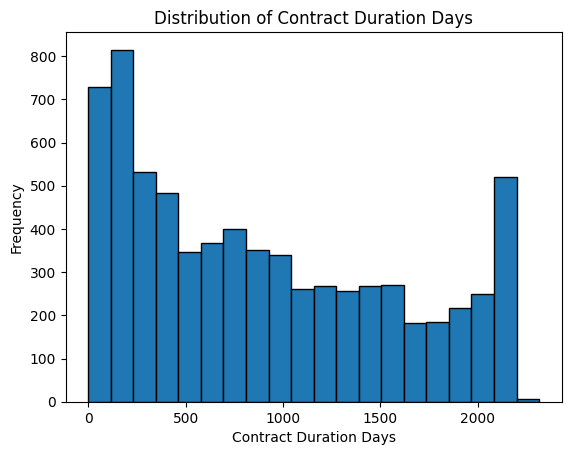

In [25]:
# Построение гистограммы
plt.hist(df_merged['contr_duration_days'], bins=20, edgecolor='black')
plt.xlabel('Contract Duration Days')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Duration Days')
plt.show()

Из гистограммы видно, что в компании имеется много контрактов с длительностью в пределах года(результат каой-то массированной рекламной компании год назад?(можно вычислить проанализировав дату заключения котракта) или клиентов действительно что то не устраивает и они в течении года начинают это понимать и отваливаются?  и достаточно большое количество "длинных" клиентов(возможно корпоративные клиенты или компании из госсектора))

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Гисторграмму вижу, а анализа нет. Что мы по ней можем увидеть?</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Добавил.</b>
</div>

Проанализируем числовые признаки

Предобработаем столбец total_charges, решим как заполнить пропуски:

In [26]:
df_merged.query('TotalCharges ==  " "')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,contr_duration_days
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,No,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,0,...,No,No,No,No,No,No,No,No,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,0,...,No,No,No,No,No,No,No,No,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,0,...,No,No,No,No,No,No,No,No,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,0,...,No,No,No,No,No,No,No,No,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0,0


Понятно, что сумма отсутствует для новых пользователей, которые стали клиентами в день выгрузки данных. Поэтому вместо пропусков поставим ноль.

In [27]:
df_merged.loc[df_merged['TotalCharges'] == " ", 'TotalCharges'] = 0


In [28]:
# Установка длительности контракта в зависимости от типа
df_merged.loc[df_merged['Type'] == 'Month-to-month', 'DaysToEnd'] = (df_merged['contr_duration_days'] - ((df_merged['contr_duration_days'] // (30)) * (30)))
df_merged.loc[df_merged['Type'] == 'One year', 'DaysToEnd'] = (df_merged['contr_duration_days'] - ((df_merged['contr_duration_days'] // (1 * 365)) * (1 * 365)))
df_merged.loc[df_merged['Type'] == 'Two year', 'DaysToEnd'] = (df_merged['contr_duration_days'] - ((df_merged['contr_duration_days'] // (2 * 365)) * (2 * 365)))

print(df_merged[['BeginDate', 'EndDate', 'Type', 'contr_duration_days', 'DaysToEnd']])


      BeginDate    EndDate            Type  contr_duration_days  DaysToEnd
0    2020-01-01 2020-02-01  Month-to-month                   31        1.0
1    2017-04-01 2020-02-01        One year                 1036      306.0
2    2019-10-01 2020-02-01  Month-to-month                  123        3.0
3    2016-05-01 2020-02-01        One year                 1371      276.0
4    2019-09-01 2020-02-01  Month-to-month                  153        3.0
...         ...        ...             ...                  ...        ...
7038 2018-02-01 2020-02-01        One year                  730        0.0
7039 2014-02-01 2020-02-01        One year                 2191        1.0
7040 2019-03-01 2020-02-01  Month-to-month                  337        7.0
7041 2019-07-01 2020-02-01  Month-to-month                  215        5.0
7042 2014-08-01 2020-02-01        Two year                 2010      550.0

[7043 rows x 5 columns]


<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: В целом верно. Есть небольшая погрешность из-за 30, но не думаю, что это окажет влияние.
</div>

Удалим столбцы с датами, поскольку из-за них произойдет утечка данных.

In [29]:
df_merged

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,contr_duration_days,DaysToEnd
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,No,0,31,1.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,0,1036,306.0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,0,123,3.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,Yes,No,Yes,Yes,No,No,No,0,1371,276.0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,No,No,No,No,No,No,0,153,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.2,Male,0,...,Yes,No,Yes,Yes,Yes,Yes,Yes,0,730,0.0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,...,No,Yes,Yes,No,Yes,Yes,Yes,0,2191,1.0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,...,Yes,No,No,No,No,No,No,0,337,7.0
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,...,No,No,No,No,No,No,Yes,0,215,5.0


In [30]:
# удалим столбцы с датами для предотвращен утечек
df_merged = df_merged.drop(['BeginDate', 'EndDate', 'customerID'], axis=1)

In [31]:
#  в числовые

columns_to_convert = ['contr_duration_days', 'MonthlyCharges', 'TotalCharges', 'DaysToEnd']

# Преобразование в float
df_merged[columns_to_convert] = df_merged[columns_to_convert].astype(np.float64)

Для оценки связи между двумя различными по типу признаками  используем коэффициент взаимной информации  библиотеку phik.

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 2</b>: Вопрос к ячейке ниже. Пишешь, что анализируем корреляции, а там ещё и заполнение пропусков (видимо, неявных) и изменение типа столбца. Как он обнаружен этот пропуск? Выше не увидел этого. Давай постараемся минимизировать количество итераций ревью и подобные действия будем пояснять с приложением срезов данных. Заказчик ведь будет задавать вопросы. Откуда уверенность, что в столбцах из columns_to_convert есть пробелы?</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Разделил. Добавил выше.</b>
</div>

In [32]:
numeric_features = ['MonthlyCharges', 'contr_duration_days', 'TotalCharges', 'DaysToEnd']  #  список числовых признаков

categorical_features = ['gender',
                        'SeniorCitizen',
                        'Partner',
                        'Dependents',
                        'InternetService',
                        'OnlineSecurity',
                        'OnlineBackup',
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',
                        'StreamingMovies',
                        'MultipleLines',
                        'Type',
                        'PaperlessBilling',
                        'PaymentMethod'
                        ]

all_features =  numeric_features + categorical_features + ['target']

correlation_matrix = phik_matrix(df_merged[all_features],  interval_cols=columns_to_convert)

target_correlation = correlation_matrix['target'].drop(['target']).sort_values(ascending=False)
print(target_correlation)


contr_duration_days    0.374569
TotalCharges           0.302890
MultipleLines          0.261237
DaysToEnd              0.240044
OnlineBackup           0.229482
Partner                0.226688
MonthlyCharges         0.226280
StreamingMovies        0.222232
DeviceProtection       0.218380
PaymentMethod          0.214832
StreamingTV            0.200198
OnlineSecurity         0.132594
TechSupport            0.103652
Type                   0.094015
SeniorCitizen          0.086159
PaperlessBilling       0.083398
InternetService        0.056621
Dependents             0.046871
gender                 0.008581
Name: target, dtype: float64


<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Две последние строчки в ячейке кода выше мастерски написаны. Очень здорово!
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Без подсказкм из рев1 ценность их была околонулевая.</b>
</div>

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: При вызове phik_matrix выше нужно передать в параметр interval_cols список числовых признаков, чтобы расчет корреляции выполнялся правильно.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Исправил.</b>
</div>

In [33]:
interval_cols = ['contr_duration_days', 'MonthlyCharges', 'TotalCharges', 'DaysToEnd']
phik_overview = df_merged.phik_matrix(interval_cols=interval_cols)
phik_overview

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,contr_duration_days,DaysToEnd
Type,1.000000,0.106860,0.277462,0.388444,0.470860,0.000000,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.065498,0.094015,0.634155,0.810978
PaperlessBilling,0.106860,1.000000,0.370495,0.467812,0.201703,0.000000,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.252972,0.083398,0.026799,0.197871
PaymentMethod,0.277462,0.370495,1.000000,0.399526,0.335666,0.000000,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.339313,0.214832,0.350964,0.272679
MonthlyCharges,0.388444,0.467812,0.399526,1.000000,0.710905,0.008175,0.304985,0.203545,0.184366,0.919002,0.551621,0.629541,0.667481,0.576525,0.835340,0.833307,0.675883,0.226280,0.387727,0.280756
TotalCharges,0.470860,0.201703,0.335666,0.710905,1.000000,0.000000,0.135650,0.381958,0.084247,0.490081,0.522090,0.622445,0.640977,0.550065,0.641488,0.643210,0.573191,0.302890,0.848337,0.359300
gender,0.000000,0.000000,0.000000,0.008175,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581,0.000000,0.022544
SeniorCitizen,0.086231,0.242133,0.292725,0.304985,0.135650,0.000000,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.221313,0.086159,0.063315,0.165501
Partner,0.179736,0.013218,0.243008,0.203545,0.381958,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.226688,0.453688,0.278708
Dependents,0.147680,0.172593,0.224903,0.184366,0.084247,0.000000,0.324576,0.652122,1.000000,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.033103,0.046871,0.198729,0.263660
InternetService,0.505187,0.231438,0.323886,0.919002,0.490081,0.000000,0.160702,0.000000,0.108463,1.000000,0.241421,0.233602,0.232916,0.239663,0.272818,0.272782,0.225383,0.056621,0.060845,0.290942


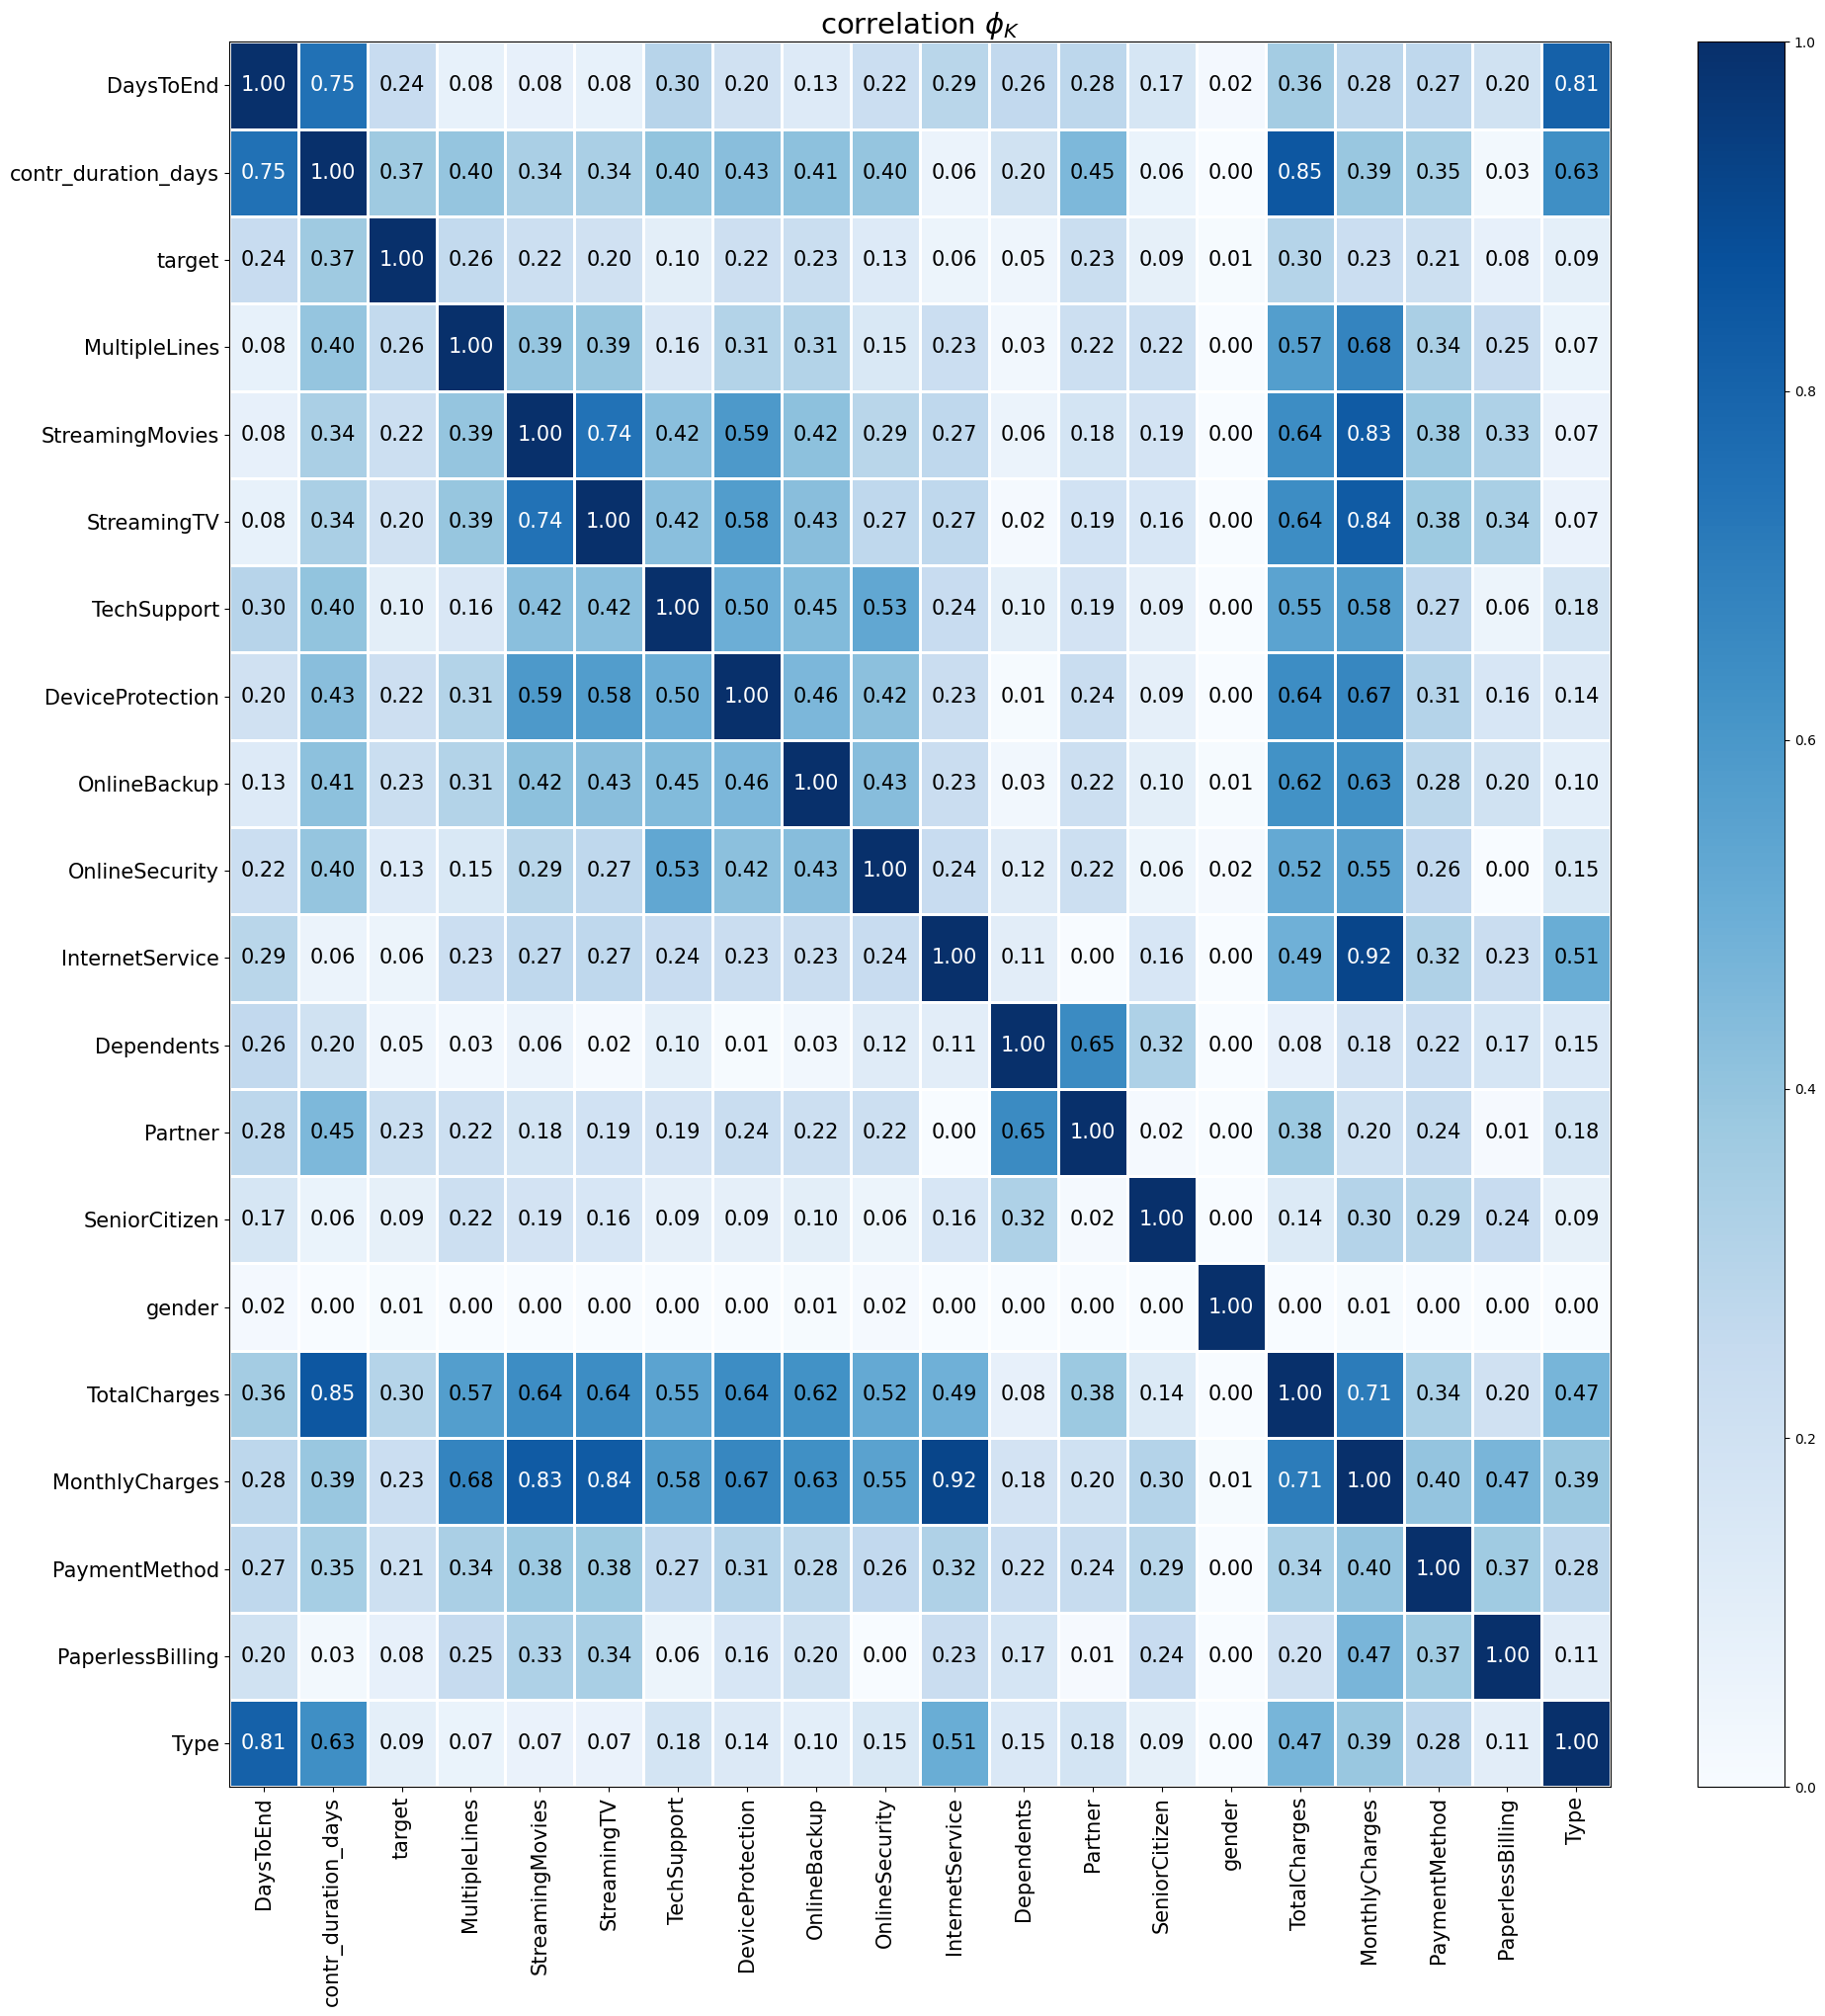

In [34]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20.5))
plt.tight_layout()

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Я бы рекомендовал перед анализом корреляций сразу исключить из датафрейма столбцы, которые заведомо не могут быть использованы для обучения модели (CustomerID, BeginDate, EndDate). Об этом намекает и предупреждение выше.</s
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Сделал.</b>
</div>

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Анализ корреляций нужно проводить после заполнения пропусков. А способ заполнения нужно обосновать.</s
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Сделал.</b>
</div>

In [35]:
# код тимлида для проверки
df_merged.isna().sum()

Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
target                 0
contr_duration_days    0
DaysToEnd              0
dtype: int64

Можно заключить следующее по построенной тепловой карте:

1. Сильная взаимосвязь стриминговых услуг и ежемесячных платежей, интернет соединения и ежемесячных платежей, а также между стриминговыми услугами как таковыми. Объясняется тем, что большинство таких услуг подключаются пакетом с ежемесячным платежем.;


2. Самая высокая взаимосвязь также между продолжительностью пользования услугами и общей суммой платежа. Логично, поскольку чем больше клиент в компании, тем больше денег он оставил независимо от размера ещемесячного платежа. Возможно признак total_charges уберем в дальнейшем, так как его можно при необходимости восстановить с помощью признаков duration и monthly charges;

3. Также отметим признаки, у которых практически отсутствуют взаимосвязи: gender, dependents;
4. У признака customer_id все наоборот, поскольку в данном столбце все значения уникальны, поэтому отображена полная взаимосвязь.
5. Добавленный признак Days_to_end, коррелирует сдлятильностью контракта и его типом(вероятно бесполезен, можно проверить результат работы модели с ним и без него)


<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Если полная взаимосвязь... вот и продолжи хорошее наблюдение, что этот признак не подходит для машинного обучения. Почему, как думаешь? Этот вопрос с собеса...</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: customerID не несет никакой информационной ценности, потому что он не можетт предоставить алгоритмам обобщенную информацию о данных. Этот признак не поможет модели предсказать какие-либо общие закономерности или зависимости. Поэтому признак customerID следует исключить из данных для обучения модели, чтобы избежать "переобучения" и излишнего усложнения модели данными, которые не помогут принятию решений моделью.</b>
<div class="alert alert-block alert-success">
✔️ <b>Ревью 3</b>: Молодчина!
</div>
</div>

In [36]:
# Задание списка числовых признаков
interval_cols = ['contr_duration_days', 'MonthlyCharges', 'TotalCharges']

# Вычисление матрицы корреляции с использованием phik
phik_corr_matrix = df_merged[interval_cols].phik_matrix(interval_cols)

print(phik_corr_matrix)

                     contr_duration_days  MonthlyCharges  TotalCharges
contr_duration_days             1.000000        0.387727      0.848337
MonthlyCharges                  0.387727        1.000000      0.710905
TotalCharges                    0.848337        0.710905      1.000000


<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Кореляцию ведь уже считали выше для всех признаков.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Согласен. Лишнее.</b>
</div>

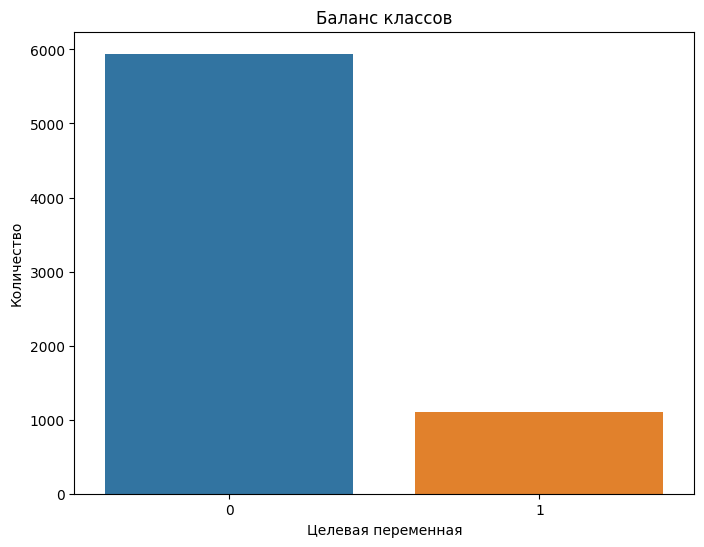

In [37]:
# Построение диаграммы баланса классов
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_merged)
plt.title('Баланс классов')
plt.xlabel('Целевая переменная')
plt.ylabel('Количество')
plt.show()

В представленном датасете достаточно сильный дисбаланс классов 1 к 6. При дальнейшем разбиении данных на выборки и посторении моделей необходимо это учитывать и применять тсоответсвующие меры.

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 2</b>: Какие выводы можешь предложить по анализу баланса классов?</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента: Добавил.</b>
</div>

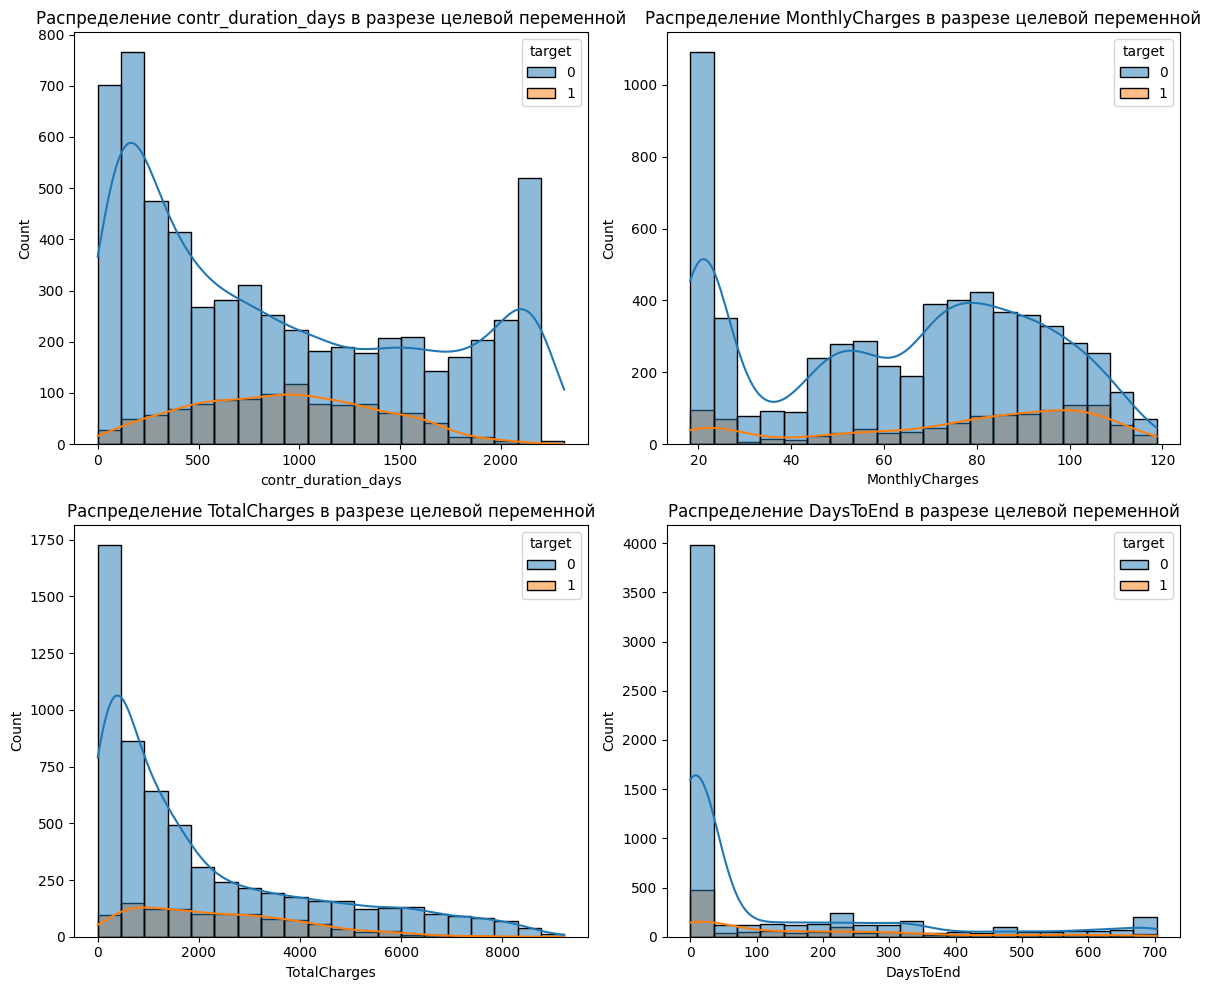

In [38]:
# Построение гистограмм для числовых признаков
numeric_cols = ['contr_duration_days', 'MonthlyCharges', 'TotalCharges', 'DaysToEnd']

plt.figure(figsize=(12, 10))
for col in numeric_cols:
    plt.subplot(2, 2, numeric_cols.index(col) + 1)
    sns.histplot(data=df_merged, x=col, hue='target', kde=True, bins=20)
    plt.title(f'Распределение {col} в разрезе целевой переменной')
plt.tight_layout()
plt.show()

На гистограммах видно:
Среди ушедших клиентов есть всплеск в районе 1000 дней, хотя трехлетних котрактов нет. Вопрос маркетологам почему?.
  У большинства клиентов размер ежемесячного платежа около 20, видимо с такой стоимостью самый популярный тариф.
Надо отметить, что у большинста потерянных клиентов был достаточно большой ежемесяный платеж 80-110 (не это ли основная причина ухода?)

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 2</b>: Какие выводы можешь предложить по анализу замечательной визуализации распределения признаков в разрезе по целевой переменной? Заказчик подпрыгивает от интереса.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: ))) Добавил.</b>
</div>

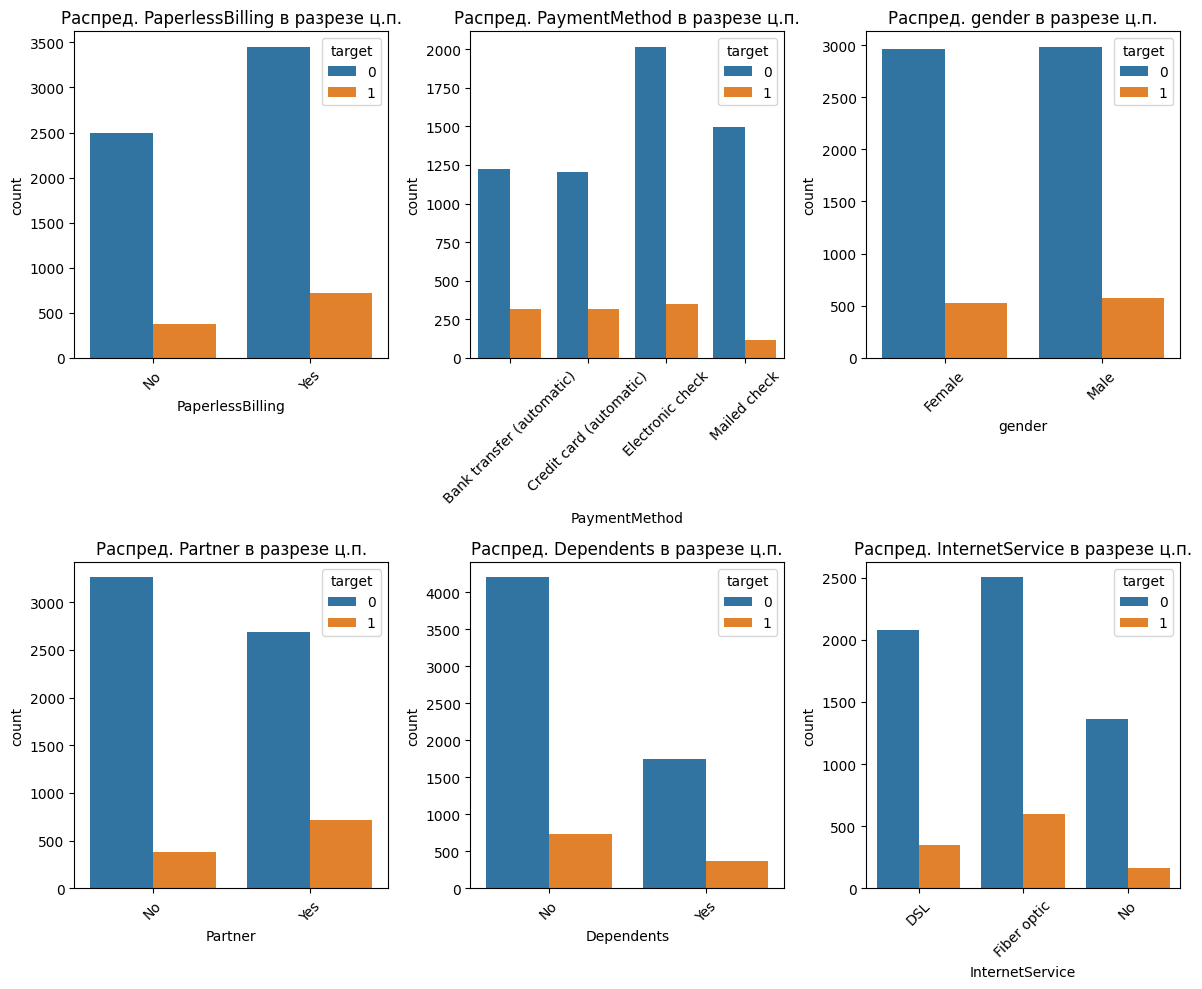

In [39]:
# Построение диаграмм уникальных значений для категориальных признаков
categorical_cols = ['PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService']

plt.figure(figsize=(12, 10))
for col in categorical_cols:
    plt.subplot(2, 3, categorical_cols.index(col) + 1)
    sns.countplot(data=df_merged, x=col, hue='target')
    plt.title(f'Распред. {col} в разрезе ц.п.')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


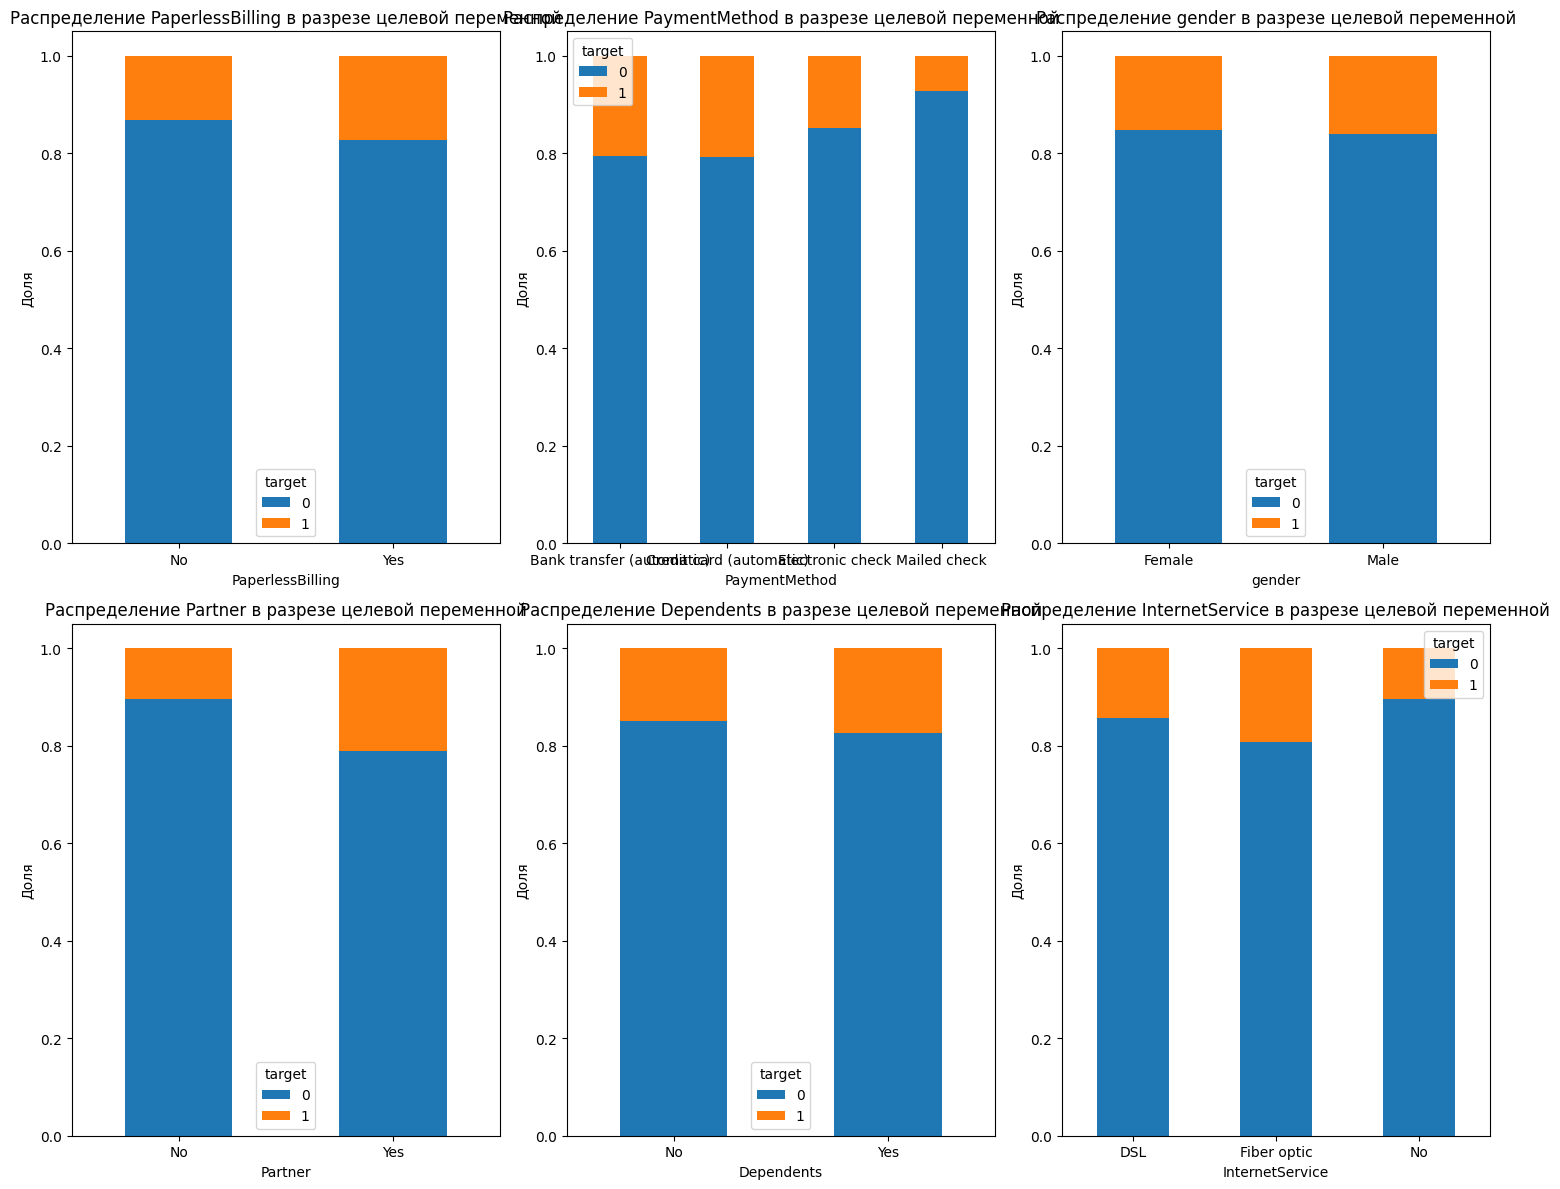

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df_grouped = df_merged.groupby(col)['target'].value_counts(normalize=True).unstack()
    df_grouped.plot(kind='bar', stacked='True', ax=plt.gca())
    plt.title(f'Распределение {col} в разрезе целевой переменной')
    plt.ylabel('Доля')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.legend(title='target')
    plt.tight_layout()

plt.show()


Изучив диаграммы можно сказать следующее:  
Сильно выраженных зависимостей не обнаружено < 10%. Признак "Gender", например и вовсе имеет одинаковые доли, следовательно для обучения модели абсолютно бесполезен. Возможно есть смысл предложить заказчику собирать какието еще данные о клиентах для получения более точных прогнозов?

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 2</b>: Какие выводы можешь предложить по анализу столбчатых диаграмм выше?</s>
</div>

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 2</b>: Не очень удобные для анализа они, да? Хотелось бы её доли посмотреть. Думаешь, что круговые диаграммы смотрелись бы информативнее?</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Добавил.</b>
<div class="alert alert-block alert-success">
✔️ <b>Ревью 3</b>: Спасибо! Так удобнее оценивать доли и строить "портреты" клиентов в разрезе по целевой переменной.
</div>
</div>

In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Type                 7043 non-null   category
 1   PaperlessBilling     7043 non-null   category
 2   PaymentMethod        7043 non-null   category
 3   MonthlyCharges       7043 non-null   float64 
 4   TotalCharges         7043 non-null   float64 
 5   gender               7043 non-null   category
 6   SeniorCitizen        7043 non-null   category
 7   Partner              7043 non-null   category
 8   Dependents           7043 non-null   category
 9   InternetService      7043 non-null   category
 10  OnlineSecurity       7043 non-null   category
 11  OnlineBackup         7043 non-null   category
 12  DeviceProtection     7043 non-null   category
 13  TechSupport          7043 non-null   category
 14  StreamingTV          7043 non-null   category
 15  StreamingMovies      

### Вывод:
1. Выполнен анализ предоставленных датасетов.
2. Появившиеся пропуски в объединенном датасете заполнены с учетом логики представленных данных;
3. Удалены столбцы, которые не повлияют на дальнейшее исследование, а также не приведут к утечке данных;
3. Рассмотрена корреляция между признаками, сделаны по ним выводы;
4. Выявлено, что данные несбалансированы в целевом признаке, что будет учтено в исследовании задачи.

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 2</b>: В конце этапа нужны общие выводы по итогам анализа.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Добавил.</b>
</div>

Вопросы для ревьювера:
- почему не рекомендуются применять нейросети может проста automl какой

<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Объектов в выборках мало, поэтому можно обойтись классическими моделями. В остальном ограничений нет. Лишь бы блокнот и обучение моделей было оформлено правильно. AutoML можно делать, как факультатив. Но в проекте нужно исследовать не автоматические модели, таково задание.
    
</div>

<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Алексей, я рад прогрессу настолько, что проверил работу очень быстро, чтобы было время на исправление препятствий к переходу на второй этап.
</div>

Так и Не понимаю, в каком месте нам удается вычислить эти неявные пропуски в TotalCharges.

- В info:
 7   TotalCharges      7043 non-null   object,
- в пропусках:  
  TotalCharges        0,
  - даже в уникальных значениях этих пробелов не видно:
  array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)
  
Ткните пожалуйста, куда смотреть.


<div class="alert alert-block alert-success">
    
✔️ <b>Ревью 3</b>: Спасибо за откровенный вопрос. Намек на неявные пропуски есть в том, что у числового по своей сути столбца тип object. Неявные пропуски лучше искать после преобразования типа общих трат к числовому, например, с помощью [to_numeric](https://pandas.pydata.org/docs/dev/reference/api/pandas.to_numeric.html) с параметром errors='coerce'. Все нее числа преобразуются в пропуски. Их можно уже фильтровать с помощью isna() и анализировать.
    
</div>

<div class="alert alert-block alert-success">
    
✔️ <b>Ревью 3</b>: Алексей, ещё раз спасибо за активное включение в работу! Первый этап принят. Можно переходить к самому интересному - моделированию. Не забудь перенести в новый блокнот всё содержимое выше, а ячейки ниже можно и удалить, чтобы они не отвлекали.
    
</div>

## Моделирование

Разобьем датасет на выборки для обучения и проверки моделей.

In [42]:
#  Разбиение на выборки


# Разделение на признаки (X) и целевую переменную (y)
X = df_merged.drop(columns=['target'])
y = df_merged['target']

# Разделение на тренировочный и тестовый наборы с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE)

# Проверка баланса классов в тренировочном наборе
print("Баланс классов в тренировочном наборе:")
print(y_train.value_counts())

# Проверка баланса классов в тестовом наборе
print("\nБаланс классов в тестовом наборе:")
print(y_test.value_counts())


Баланс классов в тренировочном наборе:
0    4456
1     826
Name: target, dtype: int64

Баланс классов в тестовом наборе:
0    1486
1     275
Name: target, dtype: int64


<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: Молодец, что применил стратификацию для сохранения баланса классов в выборках.
</div>

<div class="alert alert-block alert-warning">
⚠️ <b>Ревью 4</b>: Баланс удобнее проверять долями (normalized=True)
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Ок, спсибо!.</b>
</div>

In [43]:
# кодировние для линейных моделей только OHE

In [44]:
X_train_lm = X_train.copy()
X_test_lm = X_test.copy()

In [45]:
#категориальные признаки для OHE lm
ohe_features_lm = X_train.select_dtypes(include='category').columns.to_list()
print(ohe_features_lm)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [46]:
#численные признаки

num_features = X_train.select_dtypes(exclude='category').columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'contr_duration_days', 'DaysToEnd']

In [47]:
col_transformer_lm = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features_lm
    ),
    (
        StandardScaler(),
        num_features
    ),
     remainder='passthrough',
    verbose_feature_names_out=False
)

X_train_lm_transformed = col_transformer_lm.fit_transform(X_train_lm)
X_train_lm = pd.DataFrame(X_train_lm_transformed, columns=col_transformer_lm.get_feature_names_out())

# смотрим на результат
X_train_lm.head()

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,contr_duration_days,DaysToEnd
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.817772,-0.786049,-1.095010,-0.620881
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.327166,-0.862283,-0.784411,-0.636488
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.463300,-0.561245,0.689468,2.698270
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.479902,-0.845140,-0.649623,-0.157865
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.375311,-0.925850,-1.004175,-0.610476


<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: Здорово, что отлаживаешь конвейер на этапах его сборки.
</div>

Проверим линейную модель.



Используем пайплайн вместе с кросс-валидацией. Это позволит кодировать и масштабировать отдельно каждую тренировочную и валидационную выборки внутри кросс-валидации (без «подглядывания»):

<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: Да. Это заставит модель учиться прележнее.
</div>

In [48]:
X_train_lm = X_train.copy()

In [49]:
%%time

model_logreg = LogisticRegression(random_state=RANDOM_STATE)

#  конвейер с преобразованиями и моделью
pipeline_logreg = make_pipeline(col_transformer_lm, model_logreg)

# Задание диапазонов гиперпараметров для подбора
param_grid_logreg = {
    'logisticregression__C': np.logspace(-4, 4, 20),
}


#  GridSearchCV для LogisticRegression
gs_logreg_pl = GridSearchCV(
    pipeline_logreg,
    param_grid=param_grid_logreg,
    scoring='roc_auc',
    n_jobs=-1
)

# Подбор гиперп
gs_logreg_pl.fit(X_train_lm, y_train)

# Получение лучшего значения метрики и параметров
gs_logreg_best_score = gs_logreg_pl.best_score_
gs_logreg_best_params = gs_logreg_pl.best_params_
print(f'best_score: {gs_logreg_best_score}')
print(f'best_params: {gs_logreg_best_params}')


best_score: 0.7740117661432981
best_params: {'logisticregression__C': 29.763514416313132}
CPU times: user 748 ms, sys: 63.1 ms, total: 811 ms
Wall time: 12.5 s


Протестируем как отработают "деревянные" модели.

In [50]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

In [51]:
ohe_features_lm

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [52]:
#категориальные признаки для OHE trees
ohe_features_rf = ohe_features_lm.copy()
ohe_features_rf

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

**Случайный лес:**

In [53]:
%%time
col_transformer_rf= make_column_transformer(
    (
       OrdinalEncoder(),
        ohe_features_rf
    ),

    #  Почему в предложенном в Пачке примере для OHE?
    # (
    #     StandardScaler(),
    #     num_features
    # ),
    remainder='passthrough'
)

model_rf = DecisionTreeClassifier(random_state=RANDOM_STATE)

pipline_rf = make_pipeline(col_transformer_rf, model_rf)

param_grid_rf = {
    'decisiontreeclassifier__max_depth': range(2, 15),
    'decisiontreeclassifier__min_samples_split': (2, 3, 4),
    'decisiontreeclassifier__min_samples_leaf': (1, 2, 3, 4)
}

# получается достаточно много комбинаций гиперпараметров при переборе
# будем использовать RandomizedSearchCV, он работает на много быстрее
gs_rf = RandomizedSearchCV(
    pipline_rf,
    param_distributions=param_grid_rf,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

gs_rf.fit(X_train_rf, y_train)

gs_rf_best_score = gs_rf.best_score_
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 0.7978689559748678
best_params: {'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__max_depth': 5}
CPU times: user 241 ms, sys: 36.7 ms, total: 278 ms
Wall time: 2.47 s


<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 4</b>: Для деревянных моделей лучше использовать порядковое кодирование OrdinalEncoder и не обязательно масштабировать признаки. В том примере, видимо, были бинарные признаки.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента: Исправил.</b>
</div>

**Catboost:**

In [54]:
X_train_catboost = X_train.copy()

In [55]:
%%time

# Создание модели CatBoostClassifier с указанием параметра class_weight
model_cb = CatBoostClassifier(
    random_seed=RANDOM_STATE,
    verbose=2,
    eval_metric='AUC',
    loss_function='Logloss',
    # class_weights=[0.5, 0.5],
    auto_class_weights='Balanced',
    cat_features=ohe_features_rf
)

pipeline_cb = make_pipeline(model_cb)

# Зададим диапазоны гиперпараметров для подбора
param_grid_cb = {
    'catboostclassifier__max_depth': [1, 2, 3],
    'catboostclassifier__n_estimators': [500, 1000, 2000],
    'catboostclassifier__learning_rate': [0.1, 0.5, 0.8],
    'catboostclassifier__border_count': [128]
}

gs_cb = RandomizedSearchCV(
    pipeline_cb,
    param_distributions=param_grid_cb,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# Подбор гиперпараметров
gs_cb.fit(X_train_catboost, y_train)

# grid_search_result = CatBoostClassifier().grid_search(gs_cb, X=X_train_catboost, y=y_train, plot=True)

gs_cb_best_score = gs_cb.best_score_
gs_cb_best_params = gs_cb.best_params_
print(f'best_score: {gs_cb_best_score}')
print(f'best_params: {gs_cb_best_params}')


0:	total: 54.4ms	remaining: 1m 48s
2:	total: 66.9ms	remaining: 44.5s
4:	total: 81ms	remaining: 32.3s
6:	total: 92.3ms	remaining: 26.3s
8:	total: 103ms	remaining: 22.8s
10:	total: 115ms	remaining: 20.7s
12:	total: 134ms	remaining: 20.4s
14:	total: 145ms	remaining: 19.1s
16:	total: 156ms	remaining: 18.2s
18:	total: 166ms	remaining: 17.4s
20:	total: 177ms	remaining: 16.7s
22:	total: 188ms	remaining: 16.2s
24:	total: 199ms	remaining: 15.7s
26:	total: 211ms	remaining: 15.4s
28:	total: 221ms	remaining: 15s
30:	total: 232ms	remaining: 14.8s
32:	total: 243ms	remaining: 14.5s
34:	total: 257ms	remaining: 14.4s
36:	total: 268ms	remaining: 14.2s
38:	total: 278ms	remaining: 14s
40:	total: 289ms	remaining: 13.8s
42:	total: 301ms	remaining: 13.7s
44:	total: 310ms	remaining: 13.5s
46:	total: 321ms	remaining: 13.3s
48:	total: 332ms	remaining: 13.2s
50:	total: 343ms	remaining: 13.1s
52:	total: 354ms	remaining: 13s
54:	total: 364ms	remaining: 12.9s
56:	total: 386ms	remaining: 13.2s
58:	total: 403ms	remai

In [56]:
# # С кодированием было best_score: 0.9151500946601336
# best_params: {'catboostclassifier__n_estimators': 2000, 'catboostclassifier__max_depth': 3, 'catboostclassifier__learning_rate': 0.1, 'catboostclassifier__border_count': 128}
# CPU times: user 7.75 s, sys: 942 ms, total: 8.69 s
# Wall time: 1min 58s

<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: Да. CatBoost сам умеет кодировать категориальные признаки.
</div>

<div class="alert alert-block alert-warning">
⚠️ <b>Ревью 4</b>: Для этой модели можно поставить автоматическую балансировку классов параметром auto_class_weights='Balanced'
</div>

**Итоги:** Лучший показатель на тренировочной выборке у модели CatBoost  best_score: 0.91, протестирует ее на тестовой выборке.

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 4</b>: Если округлять правильно, то 0.918</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:Добавил. Исправил.</b>
</div>

Тестирование модели.

In [57]:
# Получаем лучшие параметры и модель с лучшими параметрами
best_model_catboost = gs_cb.best_estimator_


In [58]:
predicted_test = best_model_catboost.predict(X_test)
probabilities_test = best_model_catboost.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)
auc_roc = roc_auc_score(y_test, probabilities_one_test)
print('AUC-ROC модели Catboost на тестовой выборке:',auc_roc)

AUC-ROC модели Catboost на тестовой выборке: 0.9214682491129328


<div class="alert alert-block alert-success">
✔️ <b>Ревью 4</b>: Порог 0.85 уверенно преодолен.
</div>

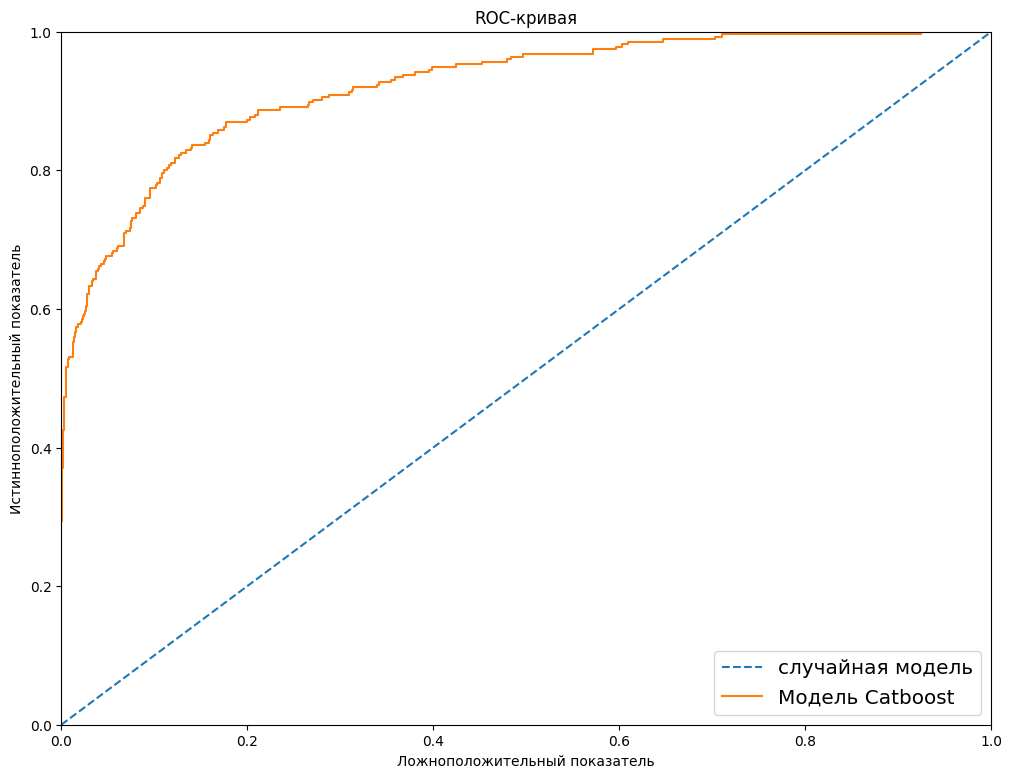

In [59]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='случайная модель')

plt.plot(fpr, tpr, label='Модель Catboost')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')

plt.legend(loc='lower right', fontsize='x-large')

plt.title('ROC-кривая')
plt.show()

Также посмотрм на важность признаков модели, а затем построим матрицу ошибок:

In [60]:
#  важности признаков
feature_importances = gs_cb.best_estimator_.named_steps['catboostclassifier'].get_feature_importance()


feature_importance_df = pd.DataFrame({'Feature': X_train_catboost.columns, 'Importance': feature_importances})

# Сортировка
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


                Feature  Importance
17  contr_duration_days   35.976044
18            DaysToEnd   26.899016
4          TotalCharges   10.156732
3        MonthlyCharges    9.576380
2         PaymentMethod    3.304279
0                  Type    2.965155
7               Partner    1.936184
9       InternetService    1.444973
16        MultipleLines    1.404876
11         OnlineBackup    0.892753
12     DeviceProtection    0.766617
5                gender    0.745420
1      PaperlessBilling    0.694334
6         SeniorCitizen    0.669112
13          TechSupport    0.627351
8            Dependents    0.624879
15      StreamingMovies    0.539416
10       OnlineSecurity    0.436665
14          StreamingTV    0.339815


Наиболее важными признаками для модели оказались: продолжительность пользования услугами, количество дней до окончания контракта, суммы помесячной и общей оплаты.

Бесполезные: межсетевой экран, наличие иждивенцев и пол клиента.

<div class="alert alert-block alert-warning">
⚠️ <b>Ревью 4</b>: Если проводить анализ важности признаков при обучении, то можно улучшить модель, отбрасывая слабые признаки.
</div>

In [61]:
# Предсказание значений на тестовом наборе данных
y_pred = gs_cb.predict(X_test)

# Построение матрицы ошибок
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1346  140]
 [  66  209]]


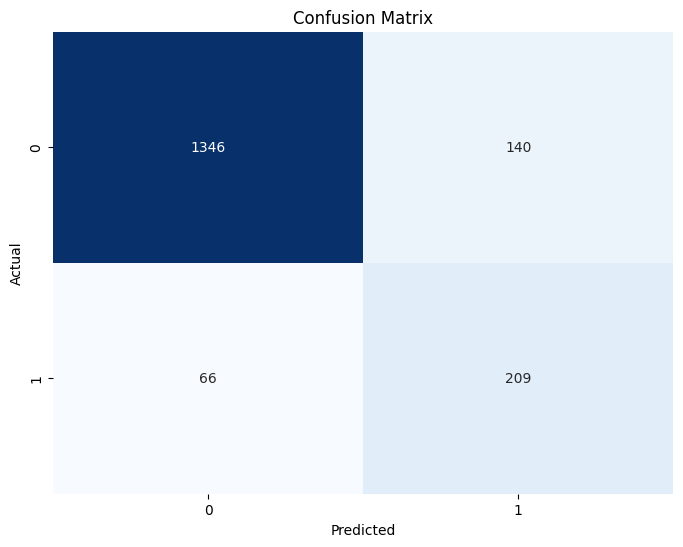

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Большинство значений в матрице - истиннопозитивные. Намного меньше модель предсказывала ложнопозитивные, чуть больше ложнонегативных.  Модель с высокой вероятностью предсказывала, ушел клиент или нет.

In [63]:

print('Качество:', accuracy_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))
print()

Качество: 0.8830210107893243
Точность: 0.5988538681948424
Полнота: 0.76



### Вывод:

1. На данном этапе данные были разделены на тренировочную и тестовую, затем закодированы и масштабированы с учетом моделей, которые предполагалось обучить;
2. Для обучения были выбраны логистическая регрессия, случайный лес, сatboost;
3. С помощью GridSearchCV были найдены лучшие гиперпараметры моделей на тренировочной выборке,  лучший показатель AUC-ROC у модели Catboost равен 0.91;
4. Модель Catboost CatBoostClassifier с гиперпараметрами border_count=128, learning_rate=0.1, max_depth=3, n_estimators=2000 на тестовой выборке показала AUC-ROC = 0.92;
<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 4</b>: Указанная в выводе метрика не соответствует коду выше.</s>
</div>
5. Наиболее важными признаками для модели оказались: продолжительность пользования услугами, количество дней до окончания контракта, суммы помесячной и общей оплаты.Бесполезные: межсетевой экран, наличие иждивенцев и пол клиента.;
6. На матрице ошибок отмечено, что модель мало ошибалась.


<div class="alert alert-block alert-info">
<b>Комментарий студента: Исправил.</b>
</div>

<div class="alert alert-block alert-success">
✔️ <b>Ревью 5</b>: Алексей, второй этап пройден. Осталось самое приятное - написать отчет. Подробное задание по написанию отчета есть на учебной платформе, а рекомендации в презентации к вводному вебинару.
</div>

## Отчет

Работа былы выполнена в соответствии снамеченным планом.
Все пункты плана были выполнены.


В работе было несколько сложных этапов:
- поиск "пропусков", в датасете, не видимых при певичнои просмотре с помощью info()
- введение дополнительного признака "DaysToEnd", связанно с логикой сортировки контрактов по длительности

Ключевые шаги работы:

**1.	Изучение данных**

- Импортированы необходимые библиотеки и метрики, рассмотрены каждые из датасетов отдельно.
- Установлено, что данные нуждаются в незначительной предобработке, в том числе необходимо выделить целевой признак, который бы отражал факт ухода клиента, исходя из этого сдеедан вывод что перед нами - задача классификации.
- На этом этапе был сформулирован предварительный план исследования. Ключевым показателем для модели установлен AUC-ROC=> 0.85.

**2.	Обработка данных**

- Данные предобработаны, изменены типы данных для некоторых признаков, обработаны пропущенные значения, которые появились в результате объединения датасетов в единый. Принято решение удалить id клиентов и столбцы с датами, которые бы привели к утечке данных.

- Добавлен целевой признак – факт отказа клиента от обслуживания. Также добавлен признак, отражающий продолжительность пользования клиентом услуг компании и признак количества дней до окончания контракта.

- Для изучения распределения признаков были построены диаграммы и тепловая диаграмма корреляции признаков phik. Отмечено, что сильная взаимосвязь стриминговых услуг и ежемесячных платежей, интернет-соединения и ежемесячных платежей, а также между стриминговыми услугами как таковыми. Самая высокая взаимосвязь также между продолжительностью пользования услугами и общей суммой платежа.

Выявлено, что данные несбалансированы в целевом признаке 6 к 1, что было учтено в дальнейшем исследовании.

**3.	Исследование задачи**

- На данном этапе были выбраны следующие модели для обучения: Логистическая регрессия, Случайный лес, Catboost. - Ключевой метрикой качества стала метрикой ROC-AUC.
- Данные разделены на две выборки принципу 75/25 без валидационной, поскольку их мало, а также они несбалансированы по целевому признаку.
- Далее данные были масштабированы, к каждой из выборок были применены техники кодирования с учетом особенностей моделей: OHE и StandardScaler для логистической регрессии, OE - для модели случайного леса.
- Для поиска лучших параметров моделей и сокращения времени воспользовались RandomizedSearchCV.

- **Лучший показатель на тренировочной выборке у модели CatBoostClassifier ROC-AUC = 0.91.
Данного показателя модель достигла при следующих гиперпараметрах:
border_count=128,
learning_rate=0.1,
max_depth=3,
n_estimators=2000.**

- Проверка качества модели на тестовой выборке показала **ROC-AUC = 0.92**, что лучше требуемого. Дополнительно модель проверена на других метриках, которые показали высокие результаты: качество = 0.88, точность: 0.59.
- Наиболее важными признаками для модели оказались: продолжительность пользования услугами, количество дней до окончания контракта, суммы помесячной и общей оплаты. Бесполезные: межсетевой экран, наличие иждивенцев и пол клиента.
- Матрица ошибок показала, что модель с высокой вероятностью предсказывала, ушел клиент или нет.

**Заключение: модель CatBoostClassifier с указанными выше гиперпараметрами является наиболее подходящей для прогнозирования оттока клиентов**

   Так же по результататам оценки важности признаков можно порекомендовать уделять особое внимание клиентам  с большой продолжительность пользования услугами, большой суммой помесячной оплаты(в том числе из-за большого оттока таких клиентов см. анализ) и проводить маркетинговые акции с клиентами перед окончанием их контракта (особенно актуально клиентов с 1 и 2 годичными контрактами).  
   Для дальнейшего увеличения точности прогнозов модели можно провести ряд мер, например:
   - удалить признаки слабо связанные с результатом работы модели
   - поэкспериментировать с порогом принятия решения.